In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Read data
data = pd.read_csv('movieReplicationSet.csv', delimiter = ',')
df = data.iloc[:,420:474]
df.isna().sum() # Check NAs

Is talkative                                                                                                                                               12
Tends to find fault with others                                                                                                                            15
Does a thorough job                                                                                                                                        18
Is depressed/Blue                                                                                                                                          14
Is original/comes up with new ideas                                                                                                                        17
Is reserved                                                                                                                                                16
Is helpful and unselfish with others                

In [3]:
# Fill NAs with median and normalize
df = df.fillna(df.median())
scaled_df=df - df.mean()

In [4]:
scaled_df.head()

,Is talkative,Tends to find fault with others,Does a thorough job,Is depressed/Blue,Is original/comes up with new ideas,Is reserved,Is helpful and unselfish with others,Can be somewhat careless,Is relaxed/handles stress well,Is curious about many different things,...,I have cried during a movie,I have trouble following the story of a movie,I have trouble remembering the story of a movie a couple of days after seeing it,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching
0,-2.385597,-1.140383,-0.048314,1.229717,0.396536,1.602552,-1.834093,-0.287147,2.083865,-3.168642,...,-0.909754,1.26618,-1.654512,-1.767548,2.90155,-0.230629,0.542388,0.74567,1.686418,-1.156791
1,-1.385597,-0.140383,-0.048314,-1.770283,-0.603464,1.602552,-0.834093,0.712853,0.083865,-1.168642,...,1.090246,0.26618,-1.654512,0.232452,-2.09845,-1.230629,1.542388,0.74567,-0.313582,-0.156791
2,0.614403,-1.140383,-0.048314,-0.770283,-0.603464,-0.397448,0.165907,0.712853,-0.916135,-0.168642,...,0.090246,0.26618,-1.654512,2.232452,0.90155,0.769371,0.542388,0.74567,0.686418,1.843209
3,1.614403,-0.140383,0.951686,1.229717,1.396536,-0.397448,0.165907,-2.287147,-0.916135,0.831358,...,0.090246,-1.73382,-1.654512,0.232452,-2.09845,-1.230629,-0.457612,0.74567,-0.313582,-1.156791
4,0.614403,0.859617,-0.048314,1.229717,-1.603464,-0.397448,0.165907,0.712853,-0.916135,-0.168642,...,0.090246,0.26618,1.345488,-0.767548,-0.09845,-0.230629,0.542388,1.74567,0.686418,1.843209


In [5]:
# PCA
pca = PCA(n_components = 54)
pca.fit(scaled_df)

PCA(n_components=54)

In [6]:
print(pca.explained_variance_)

[7.32280624 6.12254935 4.09292255 3.51284321 3.18983397 2.64942489
 2.57829921 2.05658127 1.71940293 1.4007611  1.36462177 1.21832736
 1.15866455 1.11160856 1.01411373 0.99578887 0.94797005 0.93626647
 0.87675864 0.85426756 0.82699079 0.7798828  0.77699919 0.74607798
 0.72040439 0.71164541 0.68799709 0.66915781 0.65146201 0.64126864
 0.6050736  0.60051378 0.5780626  0.57091369 0.5422789  0.53706064
 0.52041624 0.50073759 0.48300896 0.45992897 0.44976413 0.42317587
 0.41435301 0.40298551 0.39558706 0.38819029 0.35354339 0.34552255
 0.32976086 0.32201917 0.29865053 0.28981917 0.28084779 0.23569373]


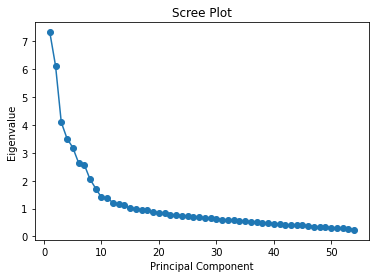

In [7]:
# Scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [8]:
# Create Loadings Matrix
pca = PCA(n_components = 2)
pca.fit(scaled_df)
loadings = pca.components_.T
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'])

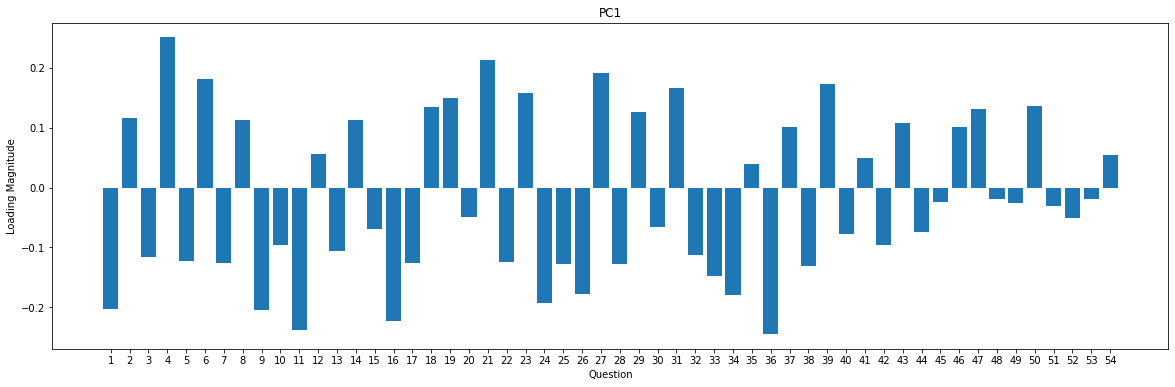

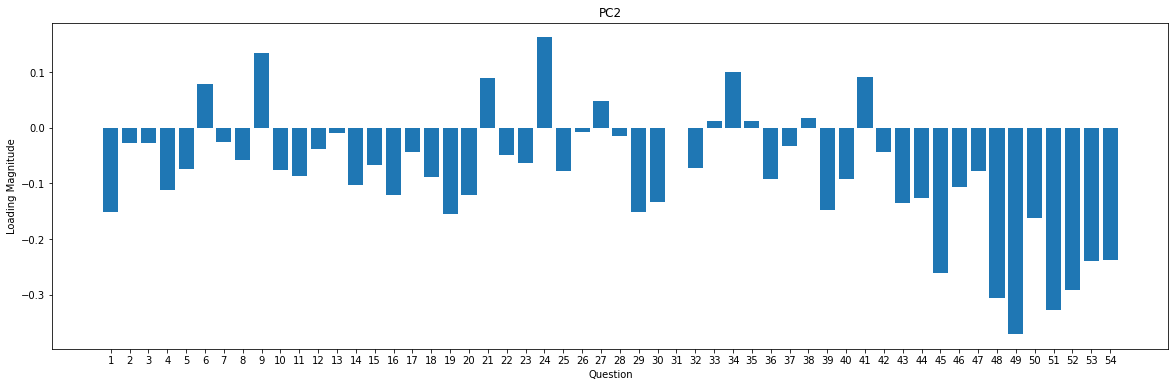

In [9]:
#Plot loadings for each principal component
for pc in loading_matrix.columns:
    fig = plt.figure(figsize = (20,6))
    plt.bar(PC_values,loading_matrix[pc])
    plt.xlabel('Question')
    plt.ylabel('Loading Magnitude')
    plt.xticks(PC_values)
    plt.title(pc)
    plt.show()

In [10]:
# Check PC1 most positive loadings
scaled_df.columns[[3,20]]

Index(['Is depressed/Blue', 'Tends to be quiet'], dtype='object')

In [11]:
# Check PC1 most negative loadings
scaled_df.columns[[10,35]]

Index(['Is full of energy', 'is outgoing/sociable'], dtype='object')

In [12]:
# Check PC2 most negative loadings
scaled_df.columns[[44,47,48,50,51,52,53]]

Index(['I have cried during a movie',
       'When watching a movie I cheer or shout or talk or curse at the screen',
       'When watching a movie I feel like the things on the screen are happening to me',
       'The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared',
       'When watching a movie I get completely immersed in the alternative reality of the film',
       'Movies change my position on social economic or political issues',
       'When watching movies things get so intense that I have to stop watching'],
      dtype='object')

In [13]:
# Rotate data
rotatedData = pca.fit_transform(scaled_df)
rotatedData_df = pd.DataFrame(rotatedData, columns=['PC1', 'PC2'])

Text(0, 0.5, 'PC2')

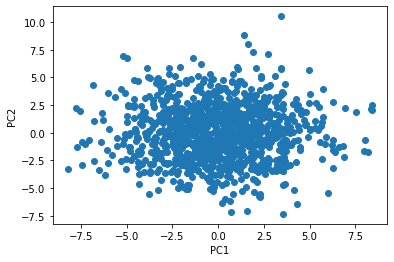

In [14]:
# Plot rotated data
plt.plot(rotatedData_df['PC1'], rotatedData_df['PC2'], 'o')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [15]:
X = rotatedData_df
scores = []

# Compute silhouette score for 2 to 14 clusters:
for ii in range(2, 15):
    kMeans = KMeans(n_clusters = int(ii)).fit(X) # compute kMeans
    s = silhouette_score(X, kMeans.labels_)
    scores.append(s)

In [16]:
# Table of silhoutte score
score = pd.DataFrame(scores, index = range(2,15))
score.T

,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.323499,0.327294,0.318676,0.318461,0.334972,0.313516,0.343086,0.339828,0.332637,0.338411,0.328196,0.329537,0.32885


In [17]:
# Fit kMeans clustering with optimal 8 clusters
kMeans = KMeans(n_clusters = 8).fit(X)

In [18]:
# Array of each user's cluster
kMeans.labels_

array([5, 7, 0, ..., 0, 5, 6])